# Reproducing Figure 2

In [1]:
###################
# Import packages #
###################

import matplotlib.pylab as plt
import sys
sys.path.append('../code/')
from makeCorner import *
import h5py

In [2]:
##############################
# Things related to plotting #
##############################

import matplotlib.pylab as plt
plt.rcParams.update({'font.size': 20})
plt.rcParams["font.family"]="Times New Roman"
rc_fonts = {
"text.usetex": True,
}
plt.rcParams.update(rc_fonts)
plt.rcParams["figure.figsize"] = (8,6) 

import seaborn as sns
my_palette = sns.color_palette("colorblind")

In [3]:
hdata = h5py.File("../data/O3_CBC_GWB_MD.hdf","r")

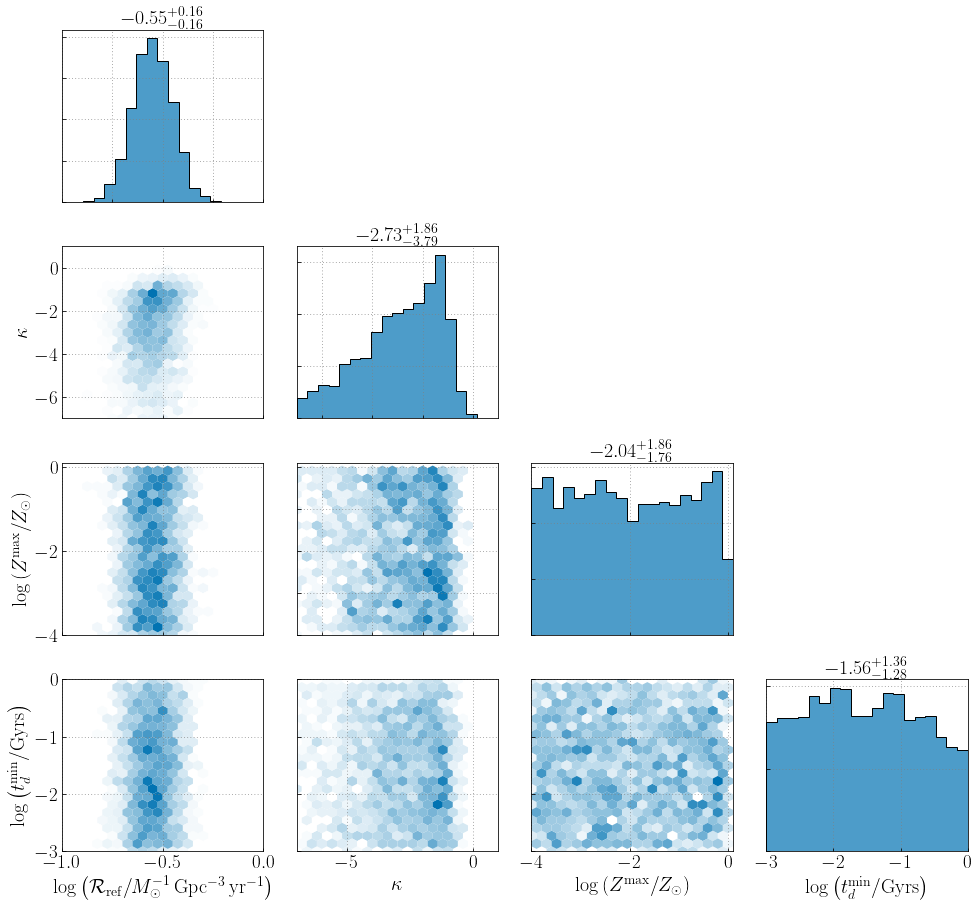

In [4]:
fig = plt.figure(figsize=(14,13))

toPlot = {
    "logRref":{"data":np.log10(hdata['posterior/R_ref'][()]),"plot_bounds":(-1,0),"label":r"$\log \left(\mathcal{R}_{\rm ref}/M_\odot^{-1}\,{\rm Gpc^{-3}}\,{\rm yr^{-1}}\right)$"},
    "kappa":{"data":hdata['posterior/kappa'][()],"plot_bounds":(-7,1),"label":r"$\kappa$"},
    "logZmax":{"data":np.log10(hdata['posterior/Zmax'][()]),"plot_bounds":(-4,0.1),"label":r"$\log \left(Z^{\rm max}/Z_\odot\right)$"},
    "log_td_min":{"data":np.log10(hdata['posterior/td_min'][()]),"plot_bounds":(-3,0),"label":r"$\log \left(t_d^{\rm min}/{\rm Gyrs}\right)$"}
}

plot_corner(fig,toPlot,color=my_palette[0],labelsize=18)
plt.tight_layout()
plt.savefig("PosteriorO3.pdf",dpi=500,bbox_inches='tight')
plt.show()

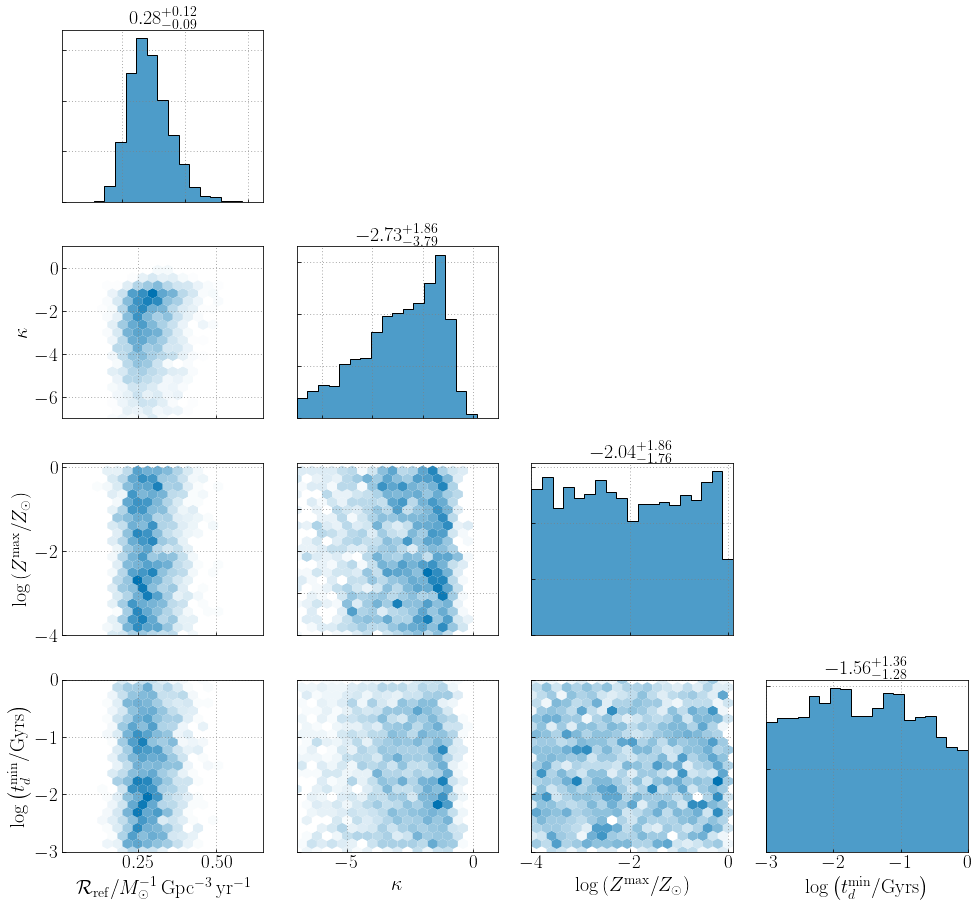

In [5]:
fig = plt.figure(figsize=(14,13))

toPlot = {
    "logRref":{"data":hdata['posterior/R_ref'][()],"plot_bounds":(0.01,0.65),"label":r"$\mathcal{R}_{\rm ref}/M_\odot^{-1}\,{\rm Gpc^{-3}}\,{\rm yr^{-1}}$"},
    "kappa":{"data":hdata['posterior/kappa'][()],"plot_bounds":(-7,1),"label":r"$\kappa$"},
    "logZmax":{"data":np.log10(hdata['posterior/Zmax'][()]),"plot_bounds":(-4,0.1),"label":r"$\log \left(Z^{\rm max}/Z_\odot\right)$"},
    "log_td_min":{"data":np.log10(hdata['posterior/td_min'][()]),"plot_bounds":(-3,0),"label":r"$\log \left(t_d^{\rm min}/{\rm Gyrs}\right)$"}
}

plot_corner(fig,toPlot,color=my_palette[0],labelsize=18)
plt.tight_layout()
plt.savefig("PosteriorO3_nolog.pdf",dpi=500,bbox_inches='tight')
plt.show()